<a href="https://colab.research.google.com/github/Avinashkali123/Data-Science-Assignment_eta-datsets/blob/main/kali_avinash_Clustering.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Task 3: Customer Segmentation / Clustering**

Step 1: Loading and Merge Data

In [2]:
import pandas as pd

# Load datasets
customers = pd.read_csv('Customers.csv')
transactions = pd.read_csv('Transactions.csv')

# Merge datasets
transactions['TransactionDate'] = pd.to_datetime(transactions['TransactionDate'])
merged_data = pd.merge(transactions, customers, on='CustomerID')

# Group by customer to calculate features for clustering
customer_features = merged_data.groupby('CustomerID').agg(
    TotalSpend=('TotalValue', 'sum'),
    AverageSpend=('TotalValue', 'mean'),
    TransactionCount=('TransactionID', 'nunique'),
    Region=('Region', lambda x: x.mode()[0])  # Mode to get the most common region
).reset_index()

# One-hot encode the region
customer_features = pd.get_dummies(customer_features, columns=['Region'])


Step 2: Scale the Features

In [3]:
from sklearn.preprocessing import StandardScaler

# Drop CustomerID for clustering
clustering_features = customer_features.drop(columns=['CustomerID'])

# Scale the data
scaler = StandardScaler()
scaled_features = scaler.fit_transform(clustering_features)


Step 3: Determine Optimal Clusters

c:\Users\DELL\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\cluster\_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
c:\Users\DELL\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\cluster\_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
c:\Users\DELL\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\cluster\_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
c:\Users\DELL\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\cluster\

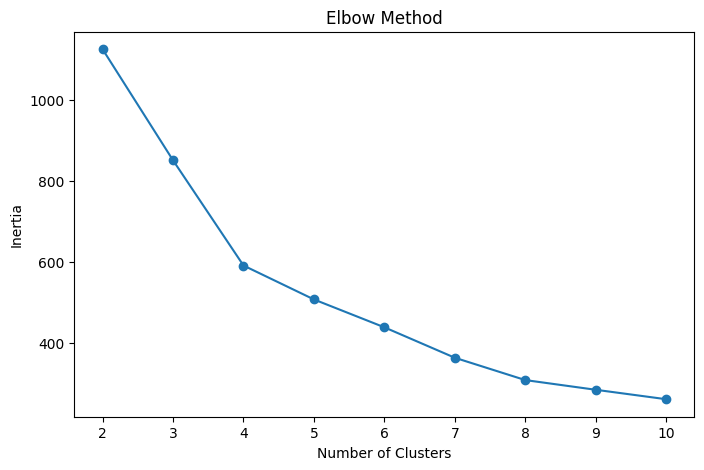

In [4]:
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt

# Use the Elbow Method to find the optimal number of clusters
inertia = []
cluster_range = range(2, 11)

for k in cluster_range:
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(scaled_features)
    inertia.append(kmeans.inertia_)

# Plot the Elbow Curve
plt.figure(figsize=(8, 5))
plt.plot(cluster_range, inertia, marker='o')
plt.title('Elbow Method')
plt.xlabel('Number of Clusters')
plt.ylabel('Inertia')
plt.show()


Step 4: Perform Clustering

In [5]:
# Choose the optimal number of clusters
optimal_clusters = 4

# Apply K-Means clustering
kmeans = KMeans(n_clusters=optimal_clusters, random_state=42)
labels = kmeans.fit_predict(scaled_features)

# Add the cluster labels to the original customer features
customer_features['Cluster'] = labels


c:\Users\DELL\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\cluster\_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


Step 5: Evaluate Clusters

In [6]:
from sklearn.metrics import davies_bouldin_score

# Calculate Davies-Bouldin Index
db_index = davies_bouldin_score(scaled_features, labels)
print(f"Davies-Bouldin Index: {db_index}")


Davies-Bouldin Index: 0.9355298648489481


Step 6: Visualize Clusters

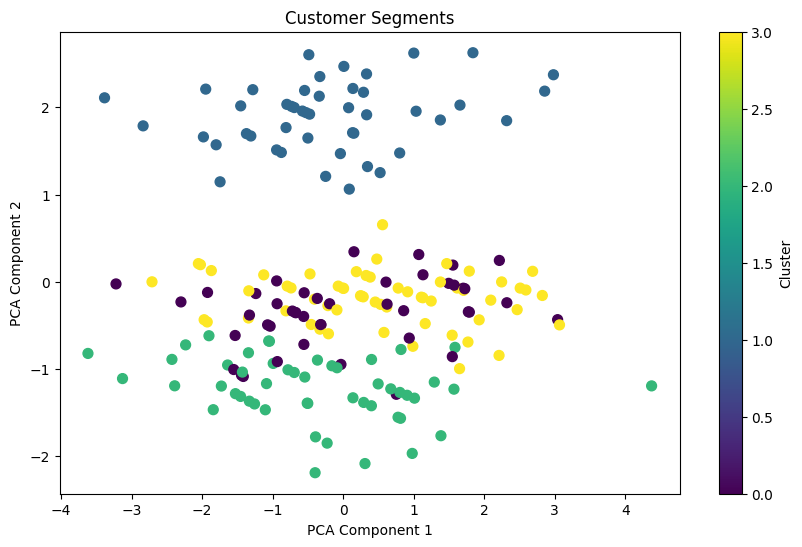

In [7]:
from sklearn.decomposition import PCA

# Reduce dimensions using PCA for visualization
pca = PCA(n_components=2)
reduced_features = pca.fit_transform(scaled_features)

# Plot the clusters
plt.figure(figsize=(10, 6))
plt.scatter(reduced_features[:, 0], reduced_features[:, 1], c=labels, cmap='viridis', s=50)
plt.title('Customer Segments')
plt.xlabel('PCA Component 1')
plt.ylabel('PCA Component 2')
plt.colorbar(label='Cluster')
plt.show()
